In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 300
import datetime as dt
import math
import seaborn as sns
import miceforest as mf
from tableone import TableOne, load_dataset

# Screen patients with S-AKI according to the definition

## sepsis

In [ ]:
data_dir = "/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2/00.data_aumc/disease_definition/sepsis/"
infile = data_dir + "aumc_sepsis_onset.csv"
df_sepsis = pd.read_csv(infile)
sepsis_lst = df_sepsis.stay_id.tolist()
print("The number of sepsis patients is (by sepsis3) :",df_sepsis.shape[0])
df_sepsis.head(1)

## CKD

In [3]:
# data_dir = "/public/hanl/jupyter_dir/database/AMUCdb/disease_definition/sepsis_episode/ref_sepsis_definition/out/"
# infile = data_dir + "combined_diagnoses.csv"
# df_ckd = pd.read_csv(infile)
# df_ckd = df_ckd[[ 'admissionid',  'specialty', 'diagnosis_type', 'diagnosis', 'diagnosis_id', 'surgical',
#        'diagnosis_group', 'diagnosis_group_id', 'diagnosis_subgroup',
#        'diagnosis_subgroup_id']]

/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## AKI

In [ ]:
data_dir = "/public/hanl/jupyter_dir/kidney_sepsis_penotype_v1/00.data_aumc/disease_definition/AKI/"
infile = data_dir + "aumc_first_and_max_stage.csv"
df_aki = pd.read_csv(infile)
df_aki_first = df_aki[["stay_id","first_aki_onset","first_aki_stage"]]
df_aki_first.columns = ["stay_id","aki_onset","aki_stage"]
aki_lst = df_aki_first.stay_id.unique().tolist()
print("The number of aki patients is (by KDIGO) :",len(aki_lst))
df_aki_first.head(2)

## sepsis without CKD;  sepsis with AKI

In [5]:
#sepsis_minus_ckd_lst = list(set(sepsis_lst).difference(ckd_lst))
#sepsis_minusCKD_addAKI_lst = list(set(sepsis_minus_ckd_lst).intersection(aki_lst))

#sepsis_noKidney_lst = list(set(sepsis_lst).difference(ckd_lst, aki_lst))
#print("sepsis_minusCKD_addAKI_lst:",len(sepsis_minusCKD_addAKI_lst)," sepsis_noKidney:",len(sepsis_noKidney_lst))
sepsis_addAKI_lst = list(set(sepsis_lst).intersection(aki_lst))
print(len(sepsis_addAKI_lst))

6350


/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# S-AKI Inclusion Criteria

# Patients who developed AKI within one week after sepsis

In [ ]:
df_sepsis = df_sepsis[df_sepsis["stay_id"].isin(sepsis_addAKI_lst)]
df_aki_first = df_aki_first[df_aki_first["stay_id"].isin(sepsis_addAKI_lst)]

df_sepsis_aki = pd.merge(df_sepsis, df_aki_first, how="left", on = ["stay_id"])
df_sepsis_aki["time_aki_minus_sepsis"] =  (df_sepsis_aki["aki_onset"] - df_sepsis_aki["sepsis_onset"])
df_sepsis_aki = df_sepsis_aki[(df_sepsis_aki["time_aki_minus_sepsis"]>0) & (df_sepsis_aki["time_aki_minus_sepsis"]<=168)]
saki_lst = df_sepsis_aki.stay_id.unique().tolist()
print("The number of patients with AKI within one week after sepsis:",len(saki_lst))
sns.distplot(df_sepsis_aki["time_aki_minus_sepsis"])
plt.show()

/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


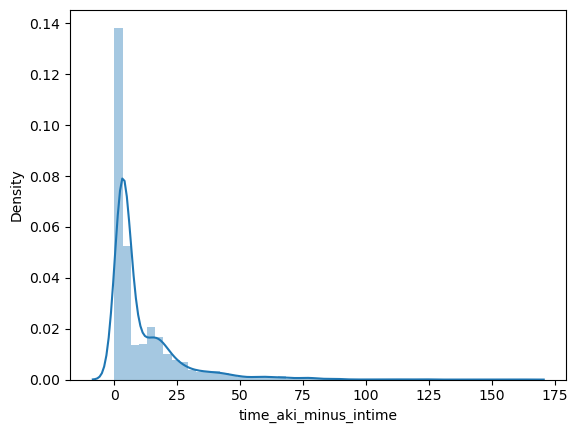

/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


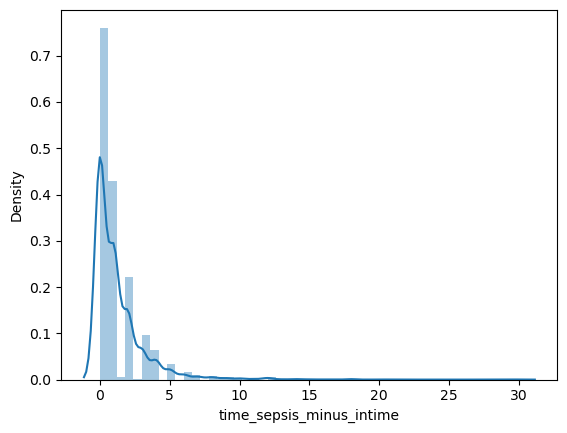

In [11]:
# df_time = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/00.data_aumc//disease_definition/AKI/aumcdb_sk_event_time.csv")
# df_time = df_time[df_time["stay_id"].isin(saki_lst)]

# df_time["time_aki_minus_intime"] =  (df_time["aki_onset"] - df_time["intime"]) 
# df_time["time_sepsis_minus_intime"] =  (df_time["sepsis_onset"] - df_time["intime"]) 
# sns.distplot(df_time[(df_time["time_aki_minus_intime"]<=168) & (df_time["time_aki_minus_intime"]>=0)]["time_aki_minus_intime"])
# plt.show()
# sns.distplot(df_time[(df_time["time_sepsis_minus_intime"]<=168) & (df_time["time_sepsis_minus_intime"]>=0)]["time_sepsis_minus_intime"])
# plt.show()

## Excluding age<18 and los<1

In [ ]:
df_demo =  pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v1/00.data_aumc/feature_data/df_admissions.csv")
df_demo = df_demo[df_demo["stay_id"].isin(saki_lst)]
df_demo = df_demo[ df_demo["lengthofstay"]>=1] 
df_demo = df_demo[(df_demo["age"]>=18)]

saki_lst_filt_lst = list(df_demo.stay_id.unique())
print("saki, Age >17 and los greater than 1 day:",len(saki_lst_filt_lst))
all_lst = saki_lst_filt_lst

## Patients with baseline cre greater than 1.5 and less than 0.5 were excluded

In [ ]:
df_base_crea = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/00.data_aumc/disease_definition/AKI/baseline_creatinine.csv")
df_base_crea["baseline_creatinine"] *= 0.01131
df_base_crea = df_base_crea[(df_base_crea["baseline_creatinine"]>=0.5) &(df_base_crea["baseline_creatinine"]<1.5)]
df_base_crea = df_base_crea.rename(columns={"admissionid":"stay_id"})
df_base_crea = df_base_crea[df_base_crea.stay_id.isin(all_lst)]

all_lst = df_base_crea.stay_id.unique()
print("Remove patients without a baseline or with a low baseline or whose baseline has reached renal failure or uremia:",len(all_lst))

# Clinical data acquisition for clustering

In [ ]:
df_saki = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/00.data_aumc/disease_definition/AKI/aumcdb_sk_event_time.csv")
df_saki = df_saki[df_saki["stay_id"].isin(all_lst)]
df_saki = df_saki[["stay_id", "saki_onset"]]

# 临床特征标准的start是 time//60； end为 time//60 + 1 即入ICU的第几小时
df_fea = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/00.data_aumc/feature_data/aumc_icu_feature.csv") # 时间单位为小时

## Obtain data by time window

In [ ]:
df_fea_add = pd.merge(df_fea,df_saki,how="inner",on="stay_id")
df_fea_add["time"] = (df_fea_add["charttime"] - df_fea_add["saki_onset"])//6
df_fea_add["time"] = df_fea_add["time"].map(lambda x:x//1) 
df_fea_add["time"] = df_fea_add["time"].map(lambda x: x+1 if x>=0 else x)

df_fea_add = df_fea_add.drop(["charttime","saki_onset"],axis=1)
df_fea_add = df_fea_add.groupby(["stay_id","time"]).agg("mean").reset_index()
df_fea_add = df_fea_add[(df_fea_add["time"]>=-4) &(df_fea_add["time"]<=28)]

# condition2: There must be a record of one day or more after SAKI occurs
tmp_df = df_fea_add.groupby("stay_id").agg({"time":max}).reset_index()
stay_lst = tmp_df[tmp_df["time"]>=4]["stay_id"].tolist()
df_fea_add = df_fea_add[df_fea_add["stay_id"].isin(stay_lst)]
all_lst = df_fea_add.stay_id.unique()
print("Patients who recorded more than one day after the occurrence of saki:", len(all_lst))

#  condition3: SAKI has at least four data recording points
df_stage = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/00.data_aumc/disease_definition/AKI/kdigo_aki_stage.csv")
df_stage = df_stage.rename(columns={"admissionid":"stay_id"})
df_stage =df_stage[df_stage["aki_stage"]>0]
df_stage = df_stage.sort_values(["stay_id","time"])
df_stage = df_stage[df_stage["stay_id"].isin(all_lst)]
df_stage = df_stage.groupby("stay_id").agg({"aki_stage":"count"}).reset_index()
df_stage = df_stage[df_stage.aki_stage >=4]
all_lst = df_stage.stay_id.unique()
print("AKI has at least four data recording points", len(all_lst))

df_fea_add = df_fea_add[df_fea_add["stay_id"].isin(all_lst)]
all_lst = df_fea_add.stay_id.unique()
print("Finally, the number of included patients:",len(all_lst))

In [ ]:
df_fea_add[~df_fea_add.urineoutput.isnull()].shape,df_fea_add[df_fea_add.urineoutput.isnull()].shape

## Forward interpolation

In [ ]:
# Forward interpolation
tmp_df = pd.DataFrame()
df_fea_add = df_fea_add.sort_values(by=["stay_id","time"])
for i,j in df_fea_add.groupby(["stay_id"]):
    j = j.fillna(method="ffill")
    tmp_df = pd.concat([tmp_df, j], axis=0)
df_im = tmp_df

In [ ]:
# Find according to na
df = df_im
tmp_df = pd.DataFrame(df.isna().sum()/df.shape[0])
tmp_df = tmp_df.reset_index()

fea_lst = tmp_df[tmp_df[0]<=0.6]["index"].tolist()
print("Deleted features", str(len(fea_lst)), tmp_df[tmp_df[0]>0.6]["index"].tolist()) 
df_im = df_im[fea_lst]
df_im.to_csv("./df_im_By_ffill.csv",index=False)

## Multiple interpolation

In [ ]:
# Multiple interpolation
df_im = pd.read_csv("./df_im_By_ffill.csv")

kernel = mf.ImputationKernel(
    df_im,
    datasets=3,
    save_all_iterations=True,
    random_state=10
)
kernel.mice(iterations = 3, n_jobs=-1)
df_im2 = kernel.complete_data(dataset=1)
df_im2.to_csv("df_im_By_MI.csv",index=False)
df_im2.head(1)

## Add an additional feature - baseline creatinine change rate

In [ ]:
# add creatinine change number is taken as the characteristic
df_feaf = pd.merge(df_im2,df_base_crea,how="inner",on="stay_id")
df_feaf["crea_divide_basecrea"] = round(df_feaf["creatinine"]/df_feaf["baseline_creatinine"],2)
df_feaf = df_feaf.drop(["baseline_creatinine"],axis=1)

## Different outputs
- Only include the average value

In [ ]:
df_feaf.to_csv("sk_feature_timescale_aumc.csv",index=False)

In [ ]:
# Check the missing rate at each time point
df =df_feaf
tmp_df = df[df["time"].isin([-4,-3,-2,-1])]
tmp_df["time"].value_counts()/len(df.stay_id.unique())

In [ ]:
df_feaf = df_feaf[df_feaf["time"]>=-2]
df_feaf.to_csv("sk_feature_timescale_Fb2_aumc.csv",index=False)

In [ ]:
import datetime
now = datetime.datetime.now()
print(now.strftime("%Y-%m-%d %H:%M:%S"))